In [1]:
# vit_shap.ipynb
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from vit import get_vit_model
from data import get_imagenette_dataloader
from shap_utils import compute_shap_values, visualize_shap

/home/kaiwen/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = get_vit_model(model_name='vit_base_patch16_224', pretrained=True, num_classes=10)

In [4]:
dataloader = get_imagenette_dataloader(batch_size=10, img_size=224)
images, labels = next(iter(dataloader))

imagenette already exists, skipping download


In [5]:
shap_values = compute_shap_values(model, images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


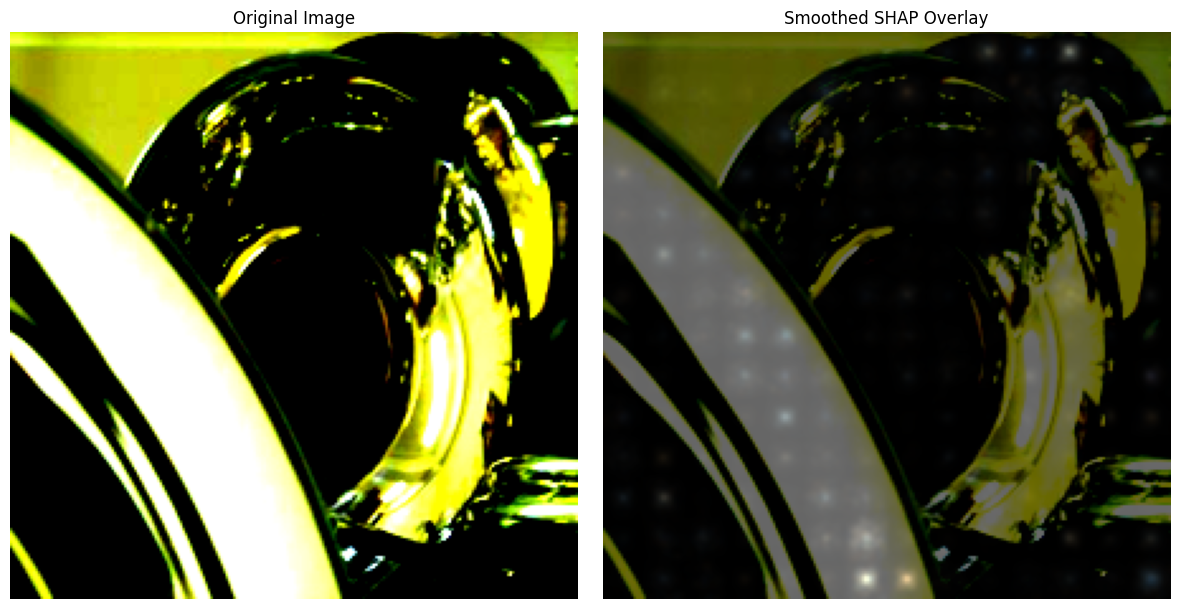

In [33]:
idx = 8
original_image = images[idx].cpu().numpy().transpose((1, 2, 0))
visualize_shap(shap_values, original_image, idx)